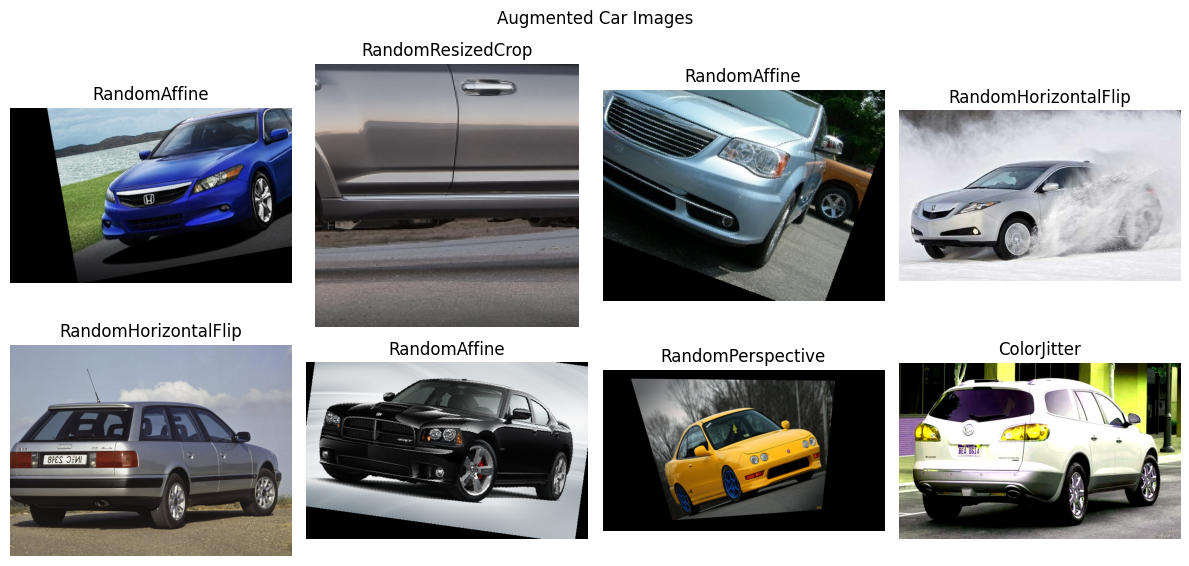

In [7]:
import os
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.io import read_image

cwd = os.getcwd()
# Set the path to your local folder containing car images
# image_folder = f'{cwd}/data/stanford-cars-dataset/cars_test/cars_test'
image_folder = '../data/stanford-cars-dataset/cars_test/cars_test'

# List of common image augmentation functions from torchvision
augmentations = [
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.RandomRotation(degrees=180),
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomPerspective(distortion_scale=0.5, p=1),
    transforms.RandomErasing(p=1)
]

# Function to apply a random augmentation to an image
def apply_random_augmentation(image):
    augmentation = random.choice(augmentations)
    return augmentation(image), augmentation._get_name()

# Get a list of image filenames in the folder
image_filenames = [filename for filename in os.listdir(image_folder) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 8 images
selected_images = random.sample(image_filenames, 8)

# Initialize a list to store augmented images
augmented_images = []

# Apply augmentations to selected images
for image_filename in selected_images:
    image_path = os.path.join(image_folder, image_filename)
    image = read_image(image_path)
    augmented_image, augmentation_name = apply_random_augmentation(image)
    augmented_images.append((augmented_image, augmentation_name))

# Create a 2x4 grid to display images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Augmented Car Images")

for ax, (augmented_image, augmentation_name) in zip(axes.flatten(), augmented_images):
    ax.imshow(augmented_image.permute(1, 2, 0))  # Permute dimensions for display
    ax.set_title(augmentation_name)  # Use the name of the applied augmentation as title
    ax.axis('off')

plt.tight_layout()
plt.show()


In [2]:
transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)._get_name()

'ColorJitter'